# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [4]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline
import seaborn as sns

### Step 2: Read in your data set 

In [5]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
df_raw.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [6]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [7]:
len(df_raw)

400

Answer: 400 rows in our data, not counting column headers.

#### Question 2. Create a summary table

In [8]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The scale of gre is much larger than gpa (max of 800 vs. 4.00 respectively).

#### Question 4. Drop data points with missing data


In [9]:
df_droppedna = df_raw.dropna()
len(df_droppedna)

397

In [10]:
df_droppedna.isnull().values.any()
#fast way

False

In [25]:
#slow way
nan_booleans = df_droppedna.isnull()
nan_booleans.head()

,admit,gre,gpa,prestige
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


In [12]:
#slow way
np.where(nan_booleans["admit"] == True)

(array([], dtype=int64),)

In [13]:
#slow way
np.where(nan_booleans["gre"] == True)

(array([], dtype=int64),)

In [14]:
#slow way
nan_booleans = df_droppedna.isnull()
np.where(nan_booleans["gpa"] == True)

(array([], dtype=int64),)

In [15]:
#slow way
nan_booleans = df_droppedna.isnull()
np.where(nan_booleans["prestige"] == True)

(array([], dtype=int64),)

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: We called isnull.values.any and got false. So there should be no null values. But we can also check if there are any true values in the array of booleans by calling the where function on each column. Ir returns no rows each time.

#### Question 6. Create box plots for GRE and GPA

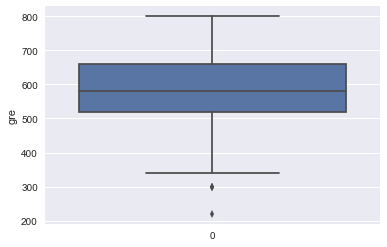

In [18]:
#boxplot 1
sns.boxplot(data=df_droppedna.gre)
plt.ylabel("gre")
sns.plt.show()

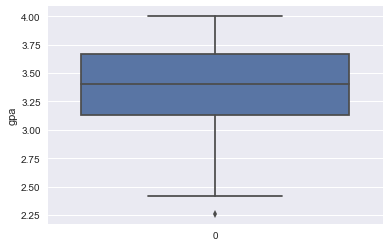

In [19]:
#boxplot 2 
sns.boxplot(data=df_droppedna.gpa)
plt.ylabel("gpa")
sns.plt.show()

#### Question 7. What do this plots show?

Answer: These show the median, 1st & 3rd quartile, and max & min for gpa and gre scores of the applicants (not just those admitted).

#### Question 8. Describe each distribution 

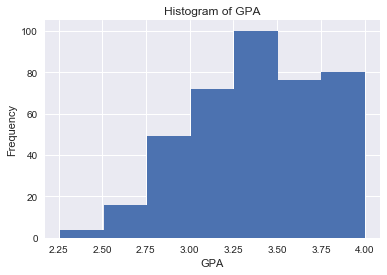

In [33]:
# plot the distribution of each variable 
df_droppedna.gpa.plot(kind='hist', bins=7, title='Histogram of GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')

In [65]:
df_droppedna['gpa'].skew()

-0.21688893296924305

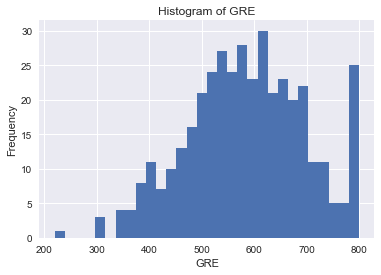

In [39]:
# plot the distribution of each variable 
df_droppedna.gre.plot(kind='hist', bins=30, title='Histogram of GRE')
plt.xlabel('GRE')
plt.ylabel('Frequency')

In [64]:
df_droppedna['gre'].skew()

-0.146046988215597

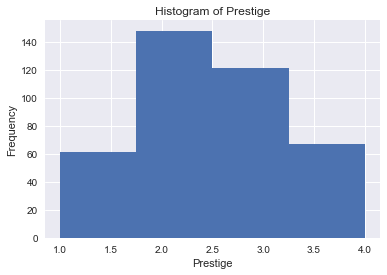

In [41]:
# plot the distribution of each variable 
df_droppedna.prestige.plot(kind='hist', bins=4, title='Histogram of Prestige')
plt.xlabel('Prestige')
plt.ylabel('Frequency')

In [66]:
df_droppedna['prestige'].skew()

0.086505552897055041

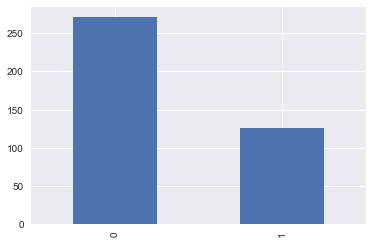

In [46]:
# plot the distribution of each variable 
df_droppedna.admit.value_counts().plot(kind='bar')

In [47]:
df_droppedna.admit.value_counts()

0    271
1    126
Name: admit, dtype: int64

In [56]:
import statsmodels.formula.api as smf
linear_model_gre = smf.ols(formula='admit ~ gre', data=df_droppedna).fit()
linear_model_gre.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     13.41
Date:                Mon, 07 Aug 2017   Prob (F-statistic):           0.000284
Time:                        21:12:24   Log-Likelihood:                -253.09
No. Observations:                 397   AIC:                             510.2
Df Residuals:                     395   BIC:                             518.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1116      0.119     -0.935      0.350      -0.346       0.123
gre            0.0007      0.000      3.662      0.000       0.000       0.001
==============================================================================
Omnibus:                      584.346   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.492
Skew:                           0.742   Prob(JB):                     9.90e-15
Kurtosis:                       1.697   Cond. No.                     3.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
linear_model_gpa = smf.ols(formula='admit ~ gpa', data=df_droppedna).fit()
linear_model_gpa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     12.35
Date:                Mon, 07 Aug 2017   Prob (F-statistic):           0.000492
Time:                        21:12:20   Log-Likelihood:                -253.61
No. Observations:                 397   AIC:                             511.2
Df Residuals:                     395   BIC:                             519.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4066      0.207     -1.961      0.051      -0.814       0.001
gpa            0.2134      0.061      3.514      0.000       0.094       0.333
==============================================================================
Omnibus:                      564.082   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.088
Skew:                           0.749   Prob(JB):                     7.35e-15
Kurtosis:                       1.700   Cond. No.                         33.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
linear_model_prestige = smf.ols(formula='admit ~ prestige', data=df_droppedna).fit()
linear_model_prestige.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     24.91
Date:                Mon, 07 Aug 2017   Prob (F-statistic):           9.02e-07
Time:                        21:13:24   Log-Likelihood:                -247.58
No. Observations:                 397   AIC:                             499.2
Df Residuals:                     395   BIC:                             507.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6157      0.064      9.630      0.000       0.490       0.741
prestige      -0.1199      0.024     -4.991      0.000      -0.167      -0.073
==============================================================================
Omnibus:                      289.617   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.484
Skew:                           0.718   Prob(JB):                     2.00e-13
Kurtosis:                       1.785   Cond. No.                         8.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Yes. They all have extremely low p values.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: 

#### Question 11. Which of our variables are potentially colinear? 

In [61]:
# create a correlation matrix for the data
df_droppedna.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: gre and gpa are more closely related to each other than to admission. However, Prestige of undergrad university, seems to be the most closely related to admission (lower numeric values signifying a more favorable scores make an inverse correlation).

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Prestige of university is the most important in predicting admission but is still a very poor indicator of admission by itself. All three values must be evaluated to predict admission. Even then, there are outlyers.

#### Question 14. What is your hypothesis? 

Answer: A fourth value must be created to evaluate the combination of gre, gpa and prestige relative to the other applicants to predict admission based on these three values.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

Answer: They can be replaced with the mean of the column as done below, if the data is missing due to an error on part of the university. However, if an applicant chose not to submit all parts of the application it often disqualifies them from consideration, so they would automatically not be admitted despite other values. So dropping these from our model would be the best practice.

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data

In [63]:
df_raw.fillna(df_raw.mean())
df_raw.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
